In [99]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import os
from os.path import isfile, join

In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [4]:
results_path = "..\\NativeApp\\results2"
result_files = [join(results_path, i) for i in os.listdir(results_path) if isfile(join(results_path, i))]
result_files.sort()
usr_res_files = [list(i) for j, i in itertools.groupby(result_files, lambda a: (a.split('\\')[-1].split('_')[0]))]

In [5]:
def get_vals(files):
    pulsewidths, frequencies, amplitudes = [], [], []
    for file in files:
        with open(file) as f:
            content = np.array([i.split(',') for i in f.read().strip().split('\n')])
            pulsewidth, frequency, amplitude = content.T
            pulsewidths.append(list(map(int,pulsewidth)))
            frequencies.append(list(map(int,frequency)))
            amplitudes.append(list(map(int,amplitude)))
    return np.array(pulsewidths).flatten(), np.array(frequencies).flatten(), np.array(amplitudes).flatten()

In [6]:
all_pw, all_fq, all_amp = get_vals(result_files) #everything (all participants all widgets all combined in single list)

In [7]:
#Get the params for specific widgets
button_pw, button_fq, button_amp = get_vals(list(filter(lambda s: "button" in s, result_files)))
radio_pw, radio_fq, radio_amp = get_vals(list(filter(lambda s: "radio" in s, result_files)))
multi_pw, multi_fq, multi_amp = get_vals(list(filter(lambda s: "multi" in s, result_files)))
text_pw, text_fq, text_amp = get_vals(list(filter(lambda s: "text" in s, result_files)))

In [8]:
%matplotlib inline
def plot_bar(x_vals, y_vals, title=None, ylim=None):
    plt.bar(np.array(list(map(str, x_vals))), y_vals)
    plt.xlabel("Presets (pw, fq, amp)")
    plt.ylabel("Responses")
    plt.title(title)
    plt.ylim(ylim)
    
def plot_wordmap(words, title):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(" ".join(words)+" ")

    plt.figure(figsize = (5, 5), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title)
    plt.show()

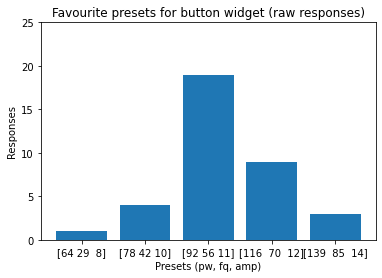

In [9]:
button_values = np.array([(64, 29, 8), (78, 42, 10), (92, 56, 11), (116, 70, 12), (139, 85, 14)])
btn_results = np.array(list(zip(button_pw, button_fq, button_amp)))
presets, count = np.unique(btn_results, return_counts=True, axis=0)
#No one chose preset 1 here so need to pad the count and preset array
presets = np.insert(presets, 0, (64, 29, 8), axis=0)
count = np.insert(count, 0, 0) 

plot_bar(presets, count, "Favourite presets for button widget (raw responses)", (0,25))

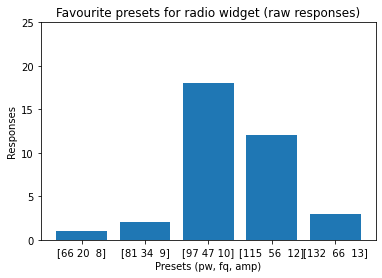

In [10]:
radio_values = np.array([(66, 20, 8), (81, 34, 9), (97, 47, 10), (115, 56, 12), (132, 66, 13)])
radio_results = np.array(list(zip(radio_pw, radio_fq, radio_amp)))
presets, count = np.unique(radio_results, return_counts=True, axis=0)
#No one chose preset 1 here so need to pad the count and preset array
presets = np.insert(presets, 0, (66, 20, 8), axis=0)
count = np.insert(count, 0, 0) 

plot_bar(presets, count, "Favourite presets for radio widget (raw responses)", (0,25))

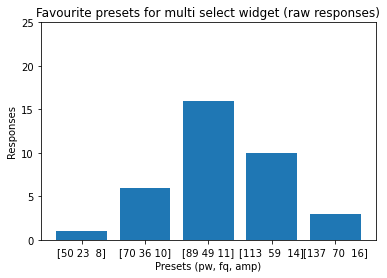

In [11]:
multi_values = np.array([(50, 23, 8), (70, 36, 10), (89, 49, 11), (113, 59, 14), (137, 70, 16)])
multi_results = np.array(list(zip(multi_pw, multi_fq, multi_amp)))
presets, count = np.unique(multi_results, return_counts=True, axis=0)

plot_bar(presets, count, "Favourite presets for multi select widget (raw responses)", (0,25))

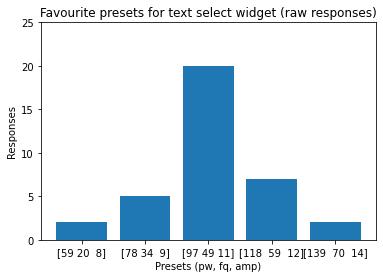

In [12]:
text_values = np.array([(59, 20, 8), (78, 34, 9), (97, 49, 11), (118, 59, 12), (139, 70, 14)])
text_results = np.array(list(zip(text_pw, text_fq, text_amp)))
presets, count = np.unique(text_results, return_counts=True, axis=0)

plot_bar(presets, count, "Favourite presets for text select widget (raw responses)", (0,25))

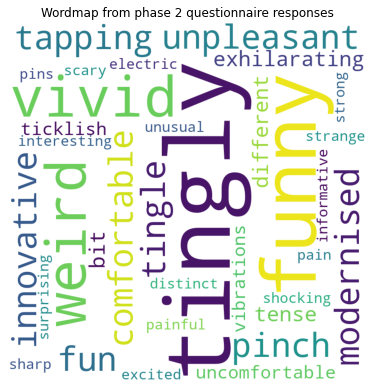

In [13]:
# Lets look at the questionaire wordmap
responses = []
with open("../Questionnaire/Electrotactile Feedback - Phase 2.csv") as f:
    responses = [i.replace('"','').split(',')[:9] for i in f.read().split('\n')] #dont include last two long form answers
    responses.pop(0)

responses = np.array(responses)
words = [i.split('-') for i in responses[:,8]]
all_words = []
for user_words in words:
    for word in user_words:
        word = word.split() #For people who didnt read the instructions and used spaces to delimit words >:(
        all_words.extend([w.strip().lower() for w in word])

plot_wordmap(all_words, "Wordmap from phase 2 questionnaire responses")

In [14]:
#Lets see what happens if we produce a wordmap from the phase 1 data plus phase 2 data
responses = []
with open("../Questionnaire/Electrotactile Feedback.csv") as f:
    responses = [i.replace('"','').split(',')[:11] for i in f.read().split('\n')] #dont include last two long form answers
    responses.pop(0)

responses = np.array(responses)
words = [i.split('-') for i in responses[:,10]]
all_words_p1 = []
for user_words in words:
    for word in user_words:
        all_words_p1.append(word.strip().lower())

{'tingly': 8, 'funny': 3, 'sharp': 3, 'strange': 3, 'uncomfortable': 3, 'buzzing': 2, 'shocking': 2, 'weird': 2, 'awkward': 1, 'bit': 1, 'comfortable': 1, 'constrictive': 1, 'different': 1, 'distinct': 1, 'electric': 1, 'excited': 1, 'exhilarating': 1, 'fun': 1, 'fuzzy': 1, 'heavy': 1, 'informative': 1, 'innovative': 1, 'interesting': 1, 'long': 1, 'modernised': 1, 'numb': 1, 'pain': 1, 'painful': 1, 'pinch': 1, 'pins': 1, 'satisfying': 1, 'scary': 1, 'snappy': 1, 'strong': 1, 'sudden': 1, 'surprising': 1, 'tapping': 1, 'tense': 1, 'ticklish': 1, 'tickly': 1, 'tingle': 1, 'twitch': 1, 'twitchy': 1, 'unexpected': 1, 'unique': 1, 'unpleasant': 1, 'unusual': 1, 'varied': 1, 'vibrating': 1, 'vibrations': 1, 'vivid': 1, 'zappy': 1}


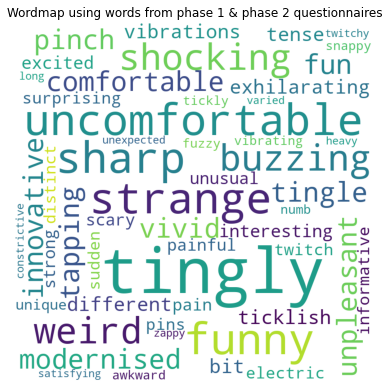

In [15]:
total_words = all_words + all_words_p1

unique, counts = np.unique(np.array(total_words), return_counts=True)
words_dict = {val: counts[i] for i, val in enumerate(unique)}  
print(dict(sorted(words_dict.items(), key=lambda item: -item[1])))

plot_wordmap(total_words, "Wordmap using words from phase 1 & phase 2 questionnaires")

## Further Analysis

Lets look first of all how consistent users were with their own responses across the three widgets. Did they choose the same preset each time? 

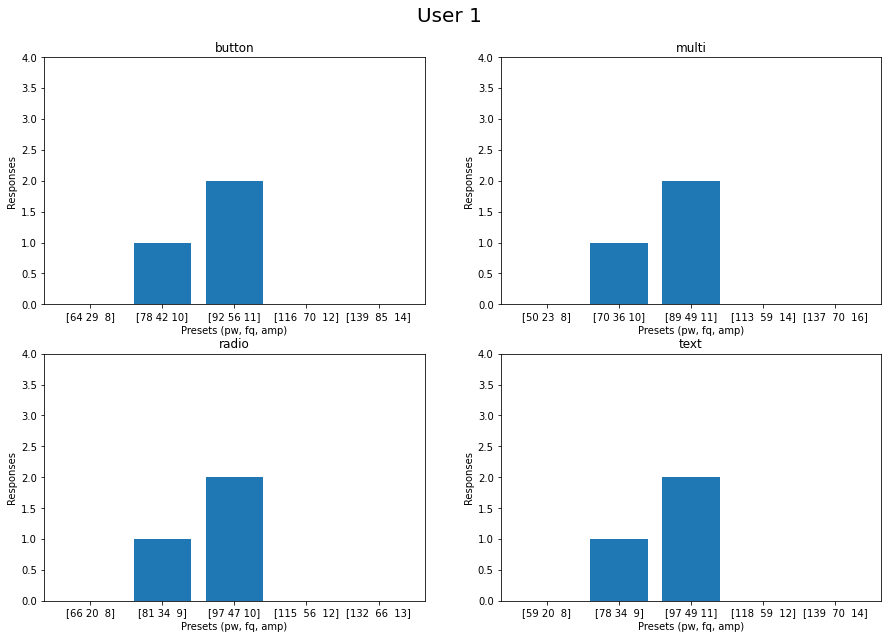

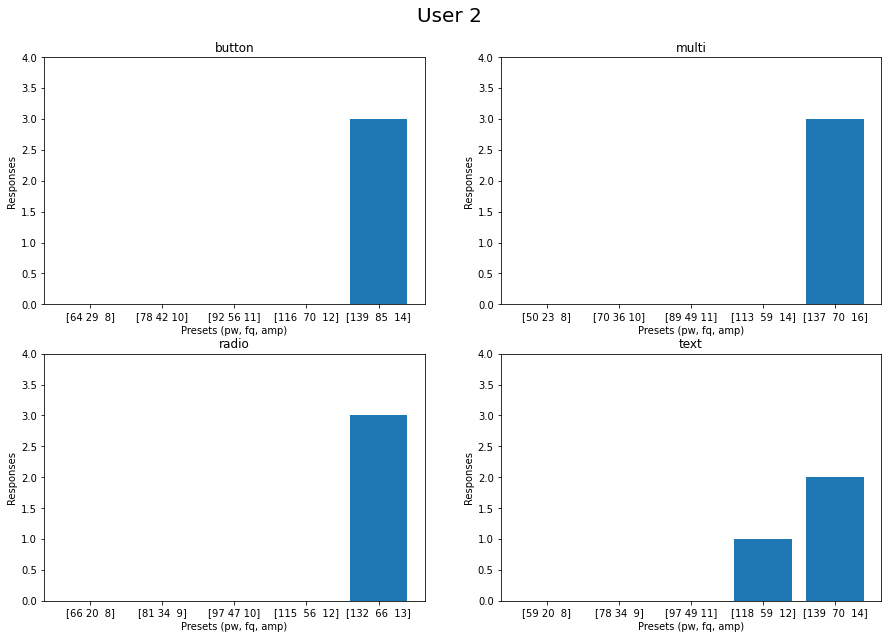

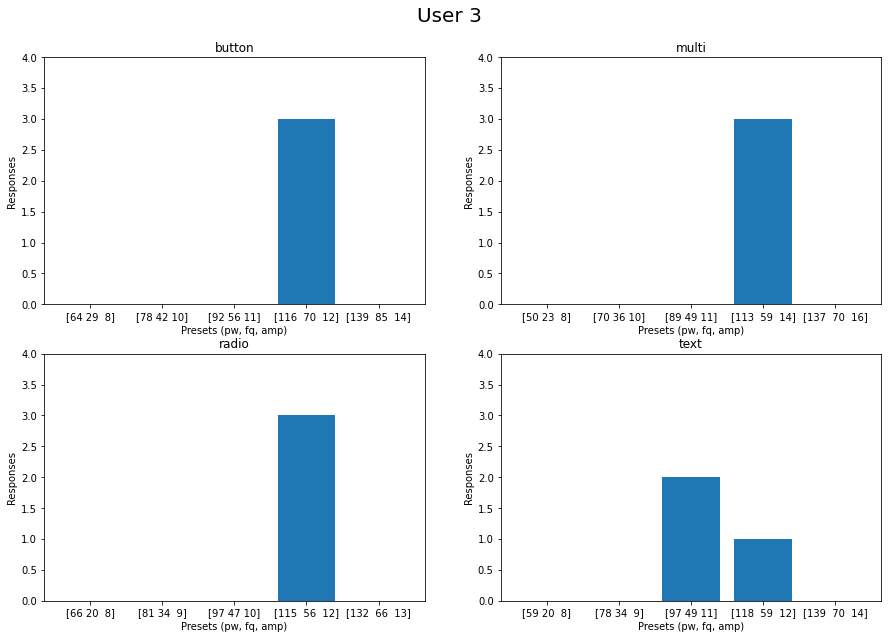

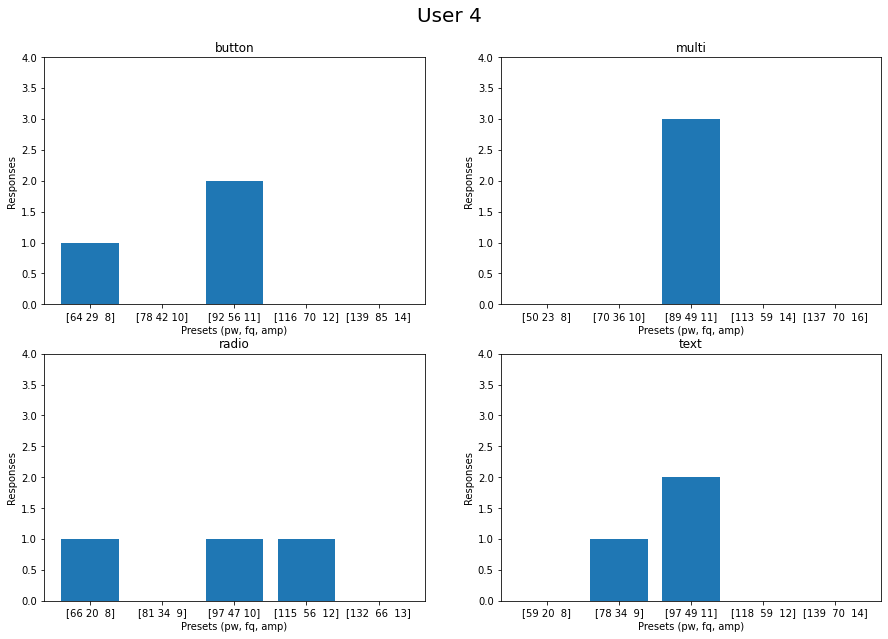

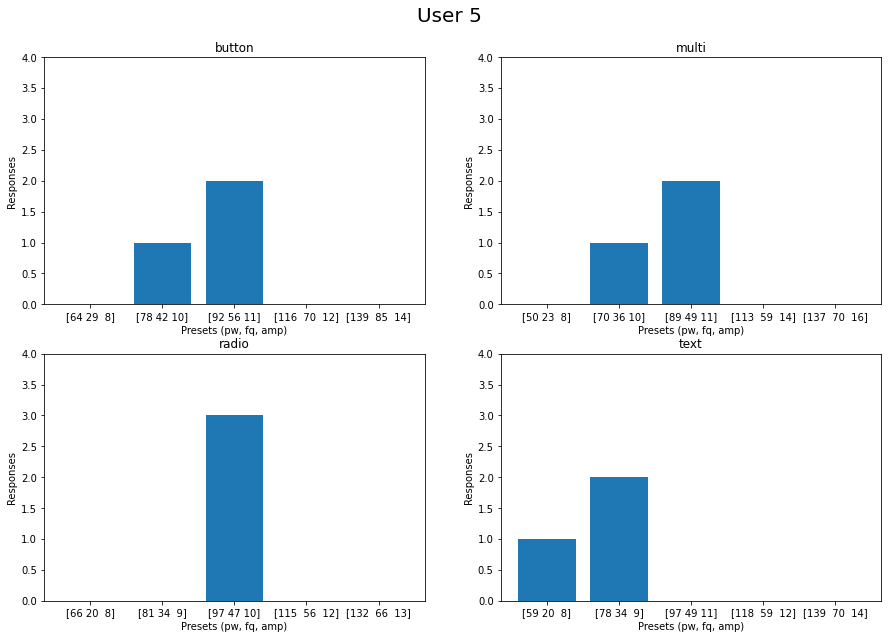

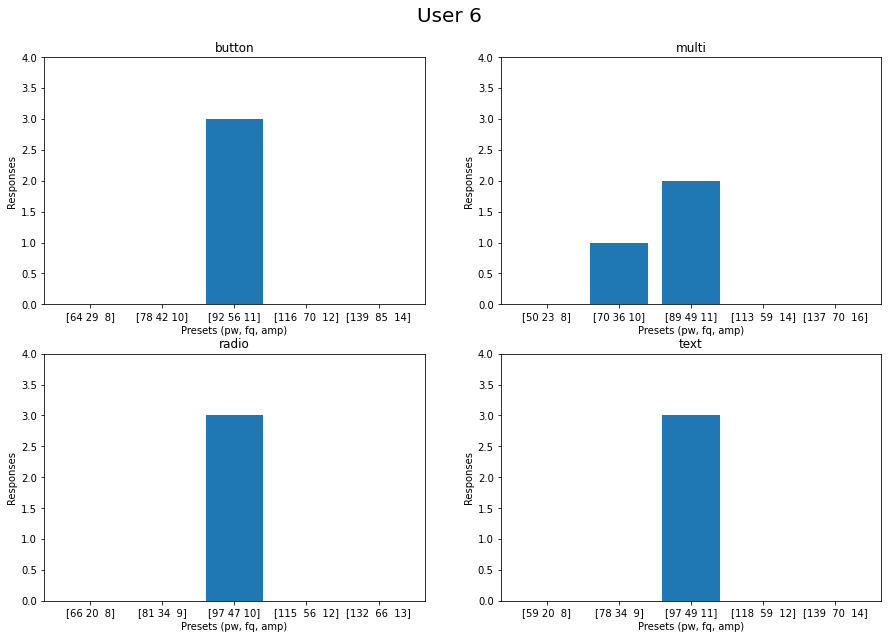

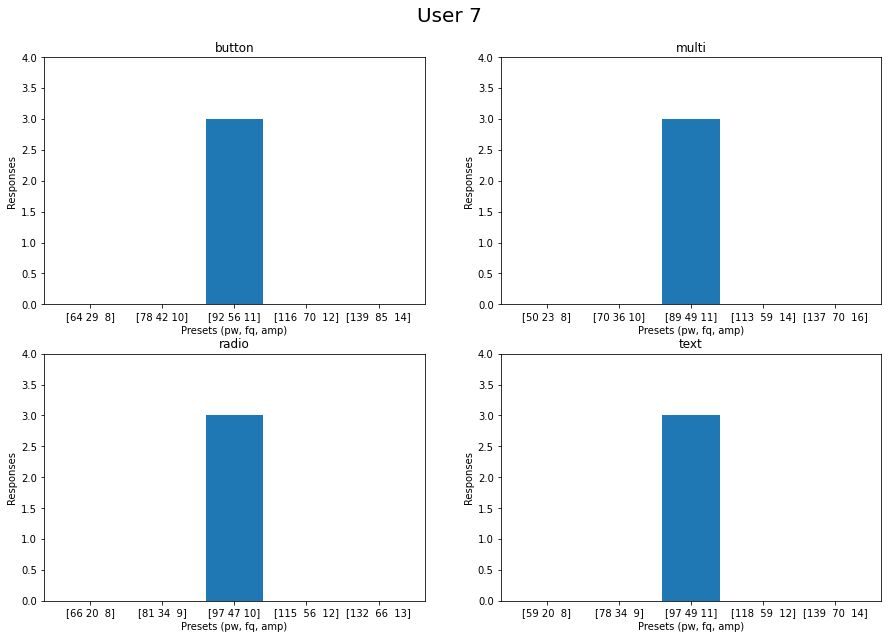

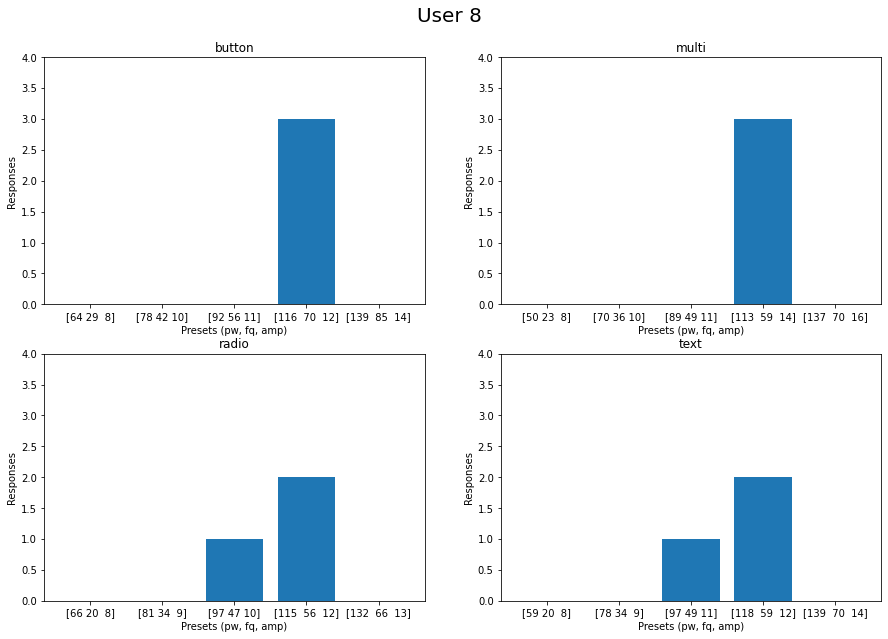

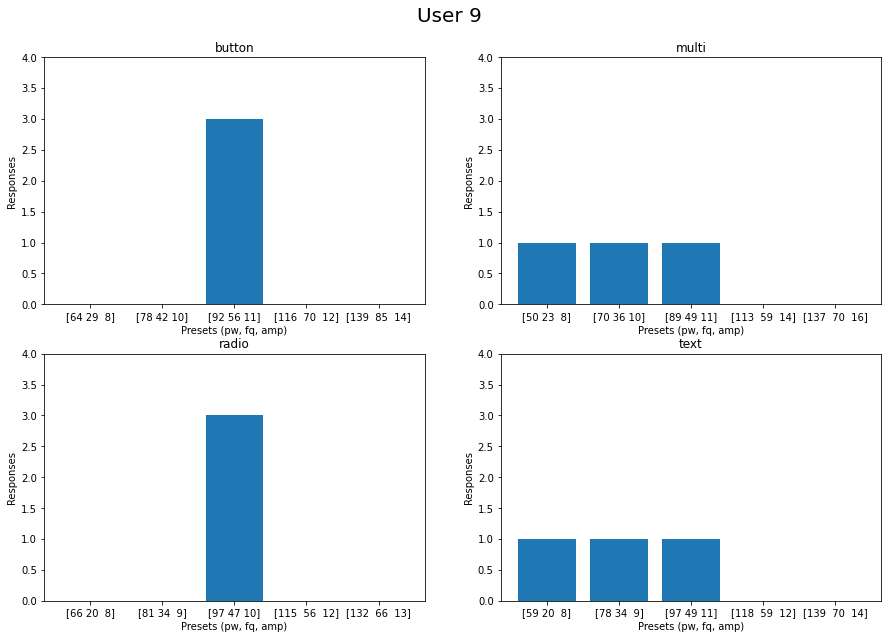

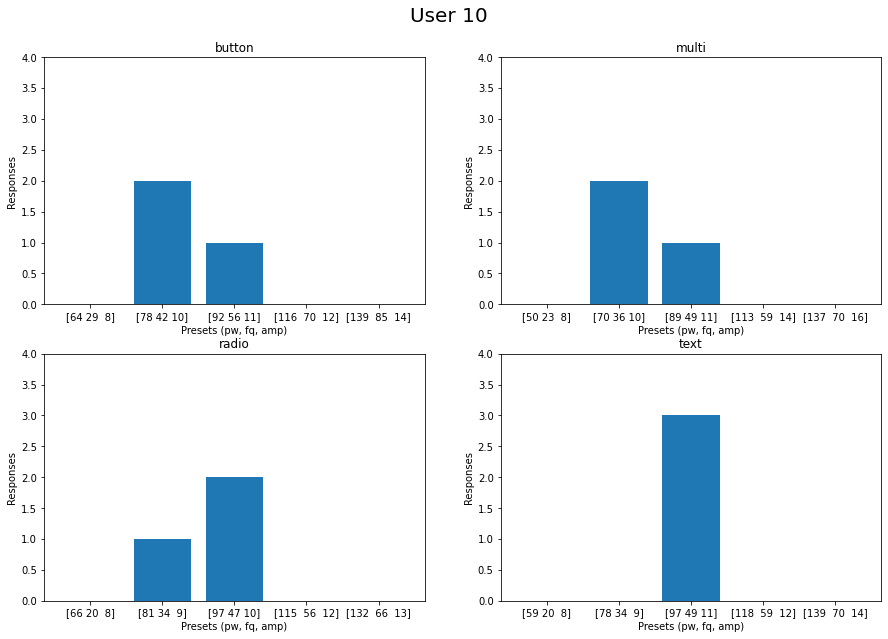

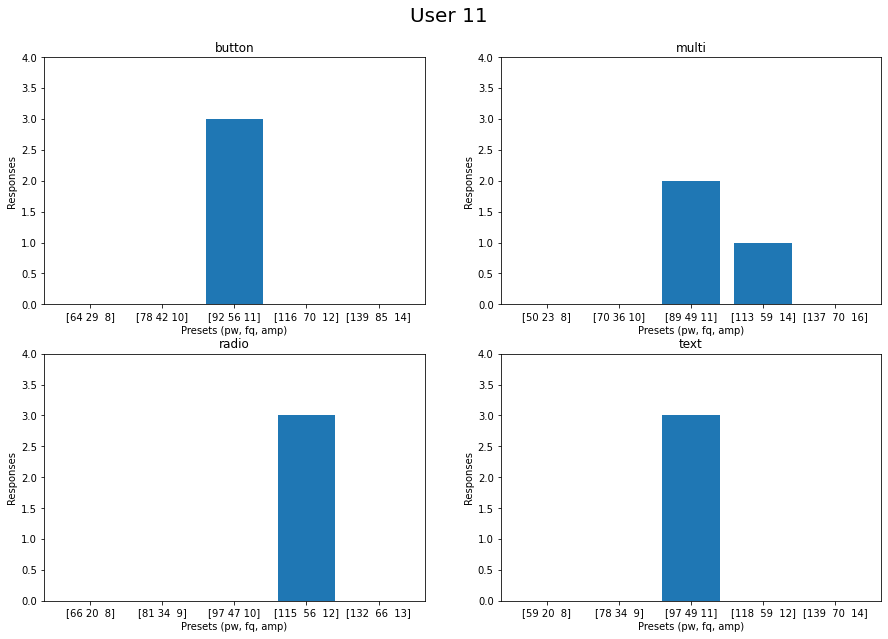

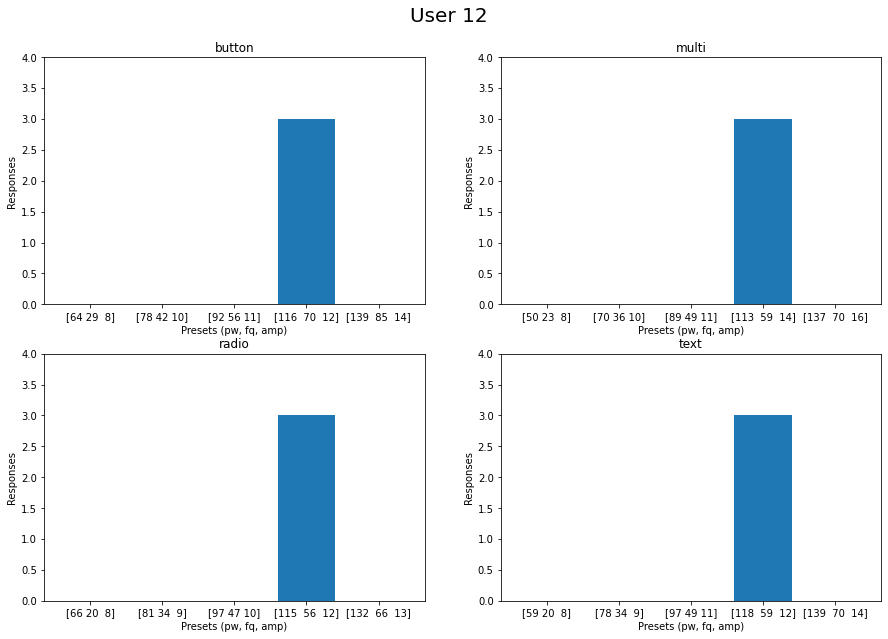

In [16]:
usr_res_files = [list(i) for j, i in itertools.groupby(result_files, lambda a: (a.split('\\')[-1].split('_')[0]))]
for j, files in enumerate(usr_res_files):
    plt.figure(figsize=(15,10))
    plt.suptitle(f"User {j+1}", y="0.95", size="20")
    for i, file in enumerate(files):
        plt.subplot(2, 2, i+1)
        plt.ylim(0,4)
        user_widget_pw, user_widget_fq, user_widget_amp = get_vals([file])
        responses = np.array(list(zip(user_widget_pw, user_widget_fq, user_widget_amp)))
        unique, count = np.unique(responses, return_counts=True, axis=0)
        if i == 0:
            x_values = button_values
            widget = "button"
        elif i == 1:
            x_values = multi_values
            widget = "multi"
        elif i == 2:
            x_values = radio_values
            widget = "radio"
        elif i == 3:
            x_values = text_values
            widget = "text"
        
        for k, val in enumerate(x_values):
            if val not in unique:
                unique = np.insert(unique, k, val, axis=0)
                count = np.insert(count, k, 0)
                
        plot_bar(unique, count, widget)

## Phase 2 Preference Ranking Analysis

In [102]:
import pandas as pd

class User:
    def __init__(self, guid=None, user_num=None, rankings=[], not_felt=[]):
        self.guid = guid
        self.user_num = user_num
        self.rankings = rankings
        self.not_felt = not_felt

rankings = pd.read_excel("./Phase2presetsheet.xlsx", sheet_name="Sheet1").to_numpy()
not_felt = pd.read_excel("./Phase2presetsheet.xlsx", sheet_name="Sheet2").to_numpy()

user_list = []
for user in rankings:
    if not user[1] > 0:
        break
    
    nf = np.array([str(i[1]) for i in not_felt if i[0] == 1][0].split(','))
    user = User(user_num=user[0], rankings=user[1:6], not_felt=nf)
    user_list.append(user)

In [ ]:
#Lets plot

## Questionnaire Response - Where could you see electrotactile feeback being used?

### Phase 1
- wearables such as smartwatches or smart clothes (I hear that is a new thing being developed)
- Maybe in driving, the wheel could give such feedback about safe changing lanes etc
- I can't see this becoming mainstream and as such cannot think of an example of it being used in day to day life
- Some kind of interaction in which you hold a device, like a mobile phone, steerig wheel, game pad...
- Ios apps/games and excel/office mundane work
- Receiving notifications on your computer or other device
- Being informed if your message or voice came through when chatting to someone online
- Video Games as they develop more into VR etc.
- notifications
- When using touchscreen devices or other devices with no physical feedback like a keyboard.
- I could see this being useful when using contactless payments on your phone - receiving a little buzz confirming the payment has been made.


### Phase 2
- When you get notifications on your phone
- Notifications from my phone 
- I guess as a replacement to Haptic feedback currently, i.e. when giving confirmation for an action. Confirming paying for something or submitting something like this form
- notifications from phone
- when entering my password as its often hidden while i'm typing it and i cant tell if i pressed  a key or not
- controlling tv remote 
- Smart watches
- Urgent notifications, e.g. alarms, where electrotactile feedback can be used in place of loud alarms, to allow for potentially better waking methods and less disturbance of others
- maybe could be connected to a digital door bell to notify if someone is at the door
- video game
- Web browsing with submission forms (can be sure they are clicked, sometimes clicking animation not always clear so physical feedback could be helpful to be sure)
- perhaps a smartwatch when it has counted an abnormally high heart rate.
